# Clustered Bar chart

Plotting 2 categorical variables

* Add hue to the sb.countplot()

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4.5) # To set teh plot figure size
%config InlineBackend.figure_format = 'retina'

In [3]:
fuel_econ = pd.read_csv("fuel-econ.csv")
print(fuel_econ.shape)
fuel_econ.head(4)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5


In [24]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0]) 

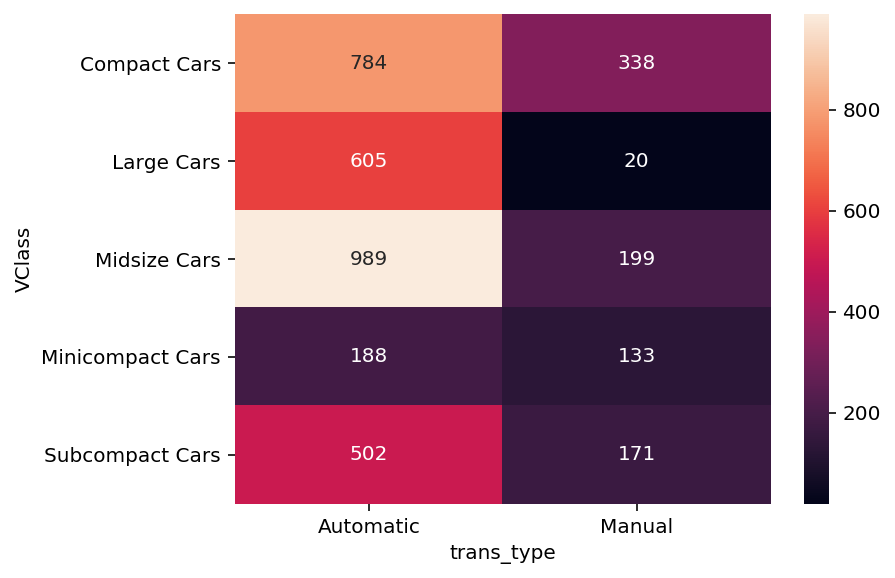

In [20]:
#Prepare the data 
ct_counts = fuel_econ.groupby(['VClass','trans_type']).size()  # group type by vclass 
ct_counts = ct_counts.reset_index(name='count') # reset_index converts into a pandas series function
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count') # rearrange rows, cols

sb.heatmap(ct_counts, annot=True, fmt='d')  #fmt-> d, all counts displayed as decimal values

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

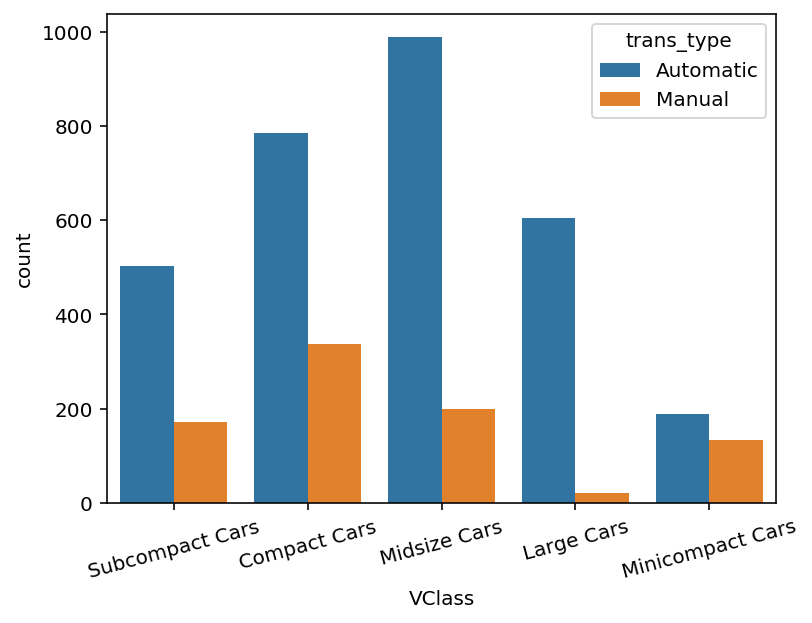

In [26]:
ax = sb.countplot(data=fuel_econ, x='VClass', hue='trans_type')
plt.xticks(rotation=15)

# ais legend can be changes like below
#ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'trans_type')